In [7]:
import sys
sys.path.append('/home/royhirsch_google_com/image_editing')

import os
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
import random

from sd_utils import get_sd_pipe, _GENERATION_CONFIGS
from hspace_helpers import get_pipeline_with_h_space

# Experiment with latents savings

In [2]:
model_name = '3'
pipe = get_sd_pipe(model_name, enable_model_cpu_offload=True)
config = _GENERATION_CONFIGS[model_name]
device = torch.device('cuda:0')

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [3]:
h_pipe = get_pipeline_with_h_space(
    model_name='sd3',
    pipe=pipe,
    h_space_layer_names=['noise', 'prompt_embeds', 'pooled_prompt_embeds', 'block_1', 'block_20'])

prompt = "An illustration of a small green elephant standing behind a large red mouse"
out = h_pipe(prompt=prompt, **config)
for name, item in out.h_space.items():
    if isinstance(item, list):
        print('{} | len={} shape of item={}'.format(name, len(item), item[0].shape))
    else:
        print('{} | shape={}'.format(name, item.shape))

# the first dim of the context and latents is 2 because of the CFG

# dim 0 is the 'empty' embeding
# dim 1 is the 'conditioned' embeding
# see:
# prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0)

  0%|          | 0/28 [00:00<?, ?it/s]

prompt_embeds | shape=torch.Size([1, 333, 4096])
pooled_prompt_embeds | shape=torch.Size([1, 2048])
noise | shape=torch.Size([1, 16, 128, 128])
block_1_context | len=28 shape of item=torch.Size([333, 1536])
block_1_latents | len=28 shape of item=torch.Size([4096, 1536])
block_20_context | len=28 shape of item=torch.Size([333, 1536])
block_20_latents | len=28 shape of item=torch.Size([4096, 1536])


  0%|          | 0/28 [00:00<?, ?it/s]

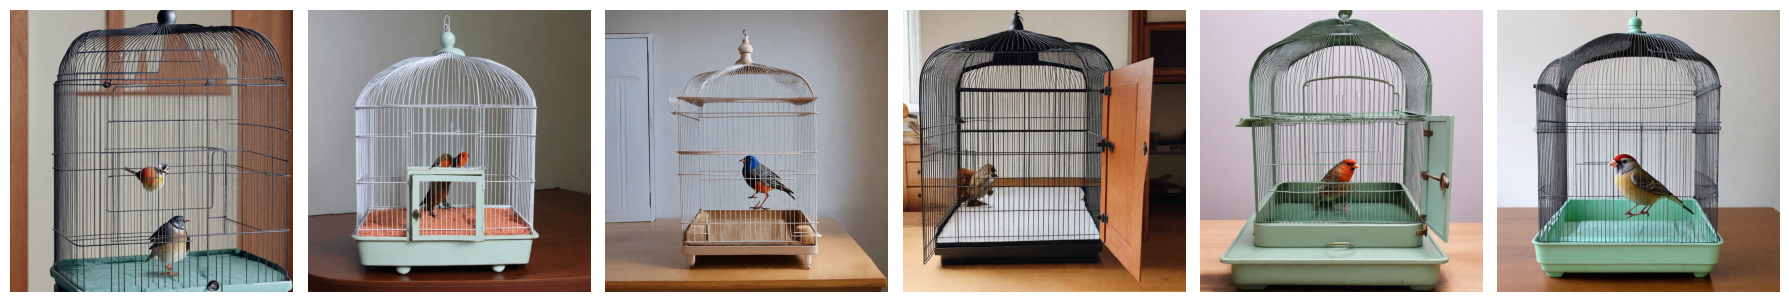

In [12]:
prompt = "A birdcage with no door and no bird inside"

n = 6
fig, axes = plt.subplots(1, n, figsize=(n * 3, 8)) 
out = pipe(prompt=[prompt] * n, **config)
for ind, image in enumerate(out.images):
    axes[ind].imshow(image)
    axes[ind].axis('off')
plt.tight_layout()
plt.show()

# 